In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, calinski_harabasz_score
from sklearn.metrics.pairwise import pairwise_distances_argmin_min
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [ ]:
df = pd.read_excel('/content/qatar-monthly-statistics-visitor-arrivals-by-mode-of-enteryecxel.xlsx')

In [ ]:
df

,Month,Air,Land,Sea,Total Visitor Arrivals
0,2024-11,280402,208687,31479,520568
1,2024-03,196297,77090,55619,329006
2,2024-01,289633,327509,85666,702808
3,2023-12,270745,155378,92733,518856
4,2023-09,169986,75631,1500,247117
...,...,...,...,...,...
78,2019-03,495011,0,93061,588072
79,2019-01,163026,0,33568,196594
80,2018-08,1153300,0,55718,1209018
81,2018-02,316957,0,30667,347624


In [ ]:

df.rename(columns={
    ' Air': 'Air Arrivals',
    ' Land': 'Land Arrivals',
    ' Sea': 'Sea Arrivals',
    '  Total Visitor Arrivals': 'Total Visitor Arrivals'
}, inplace=True)


df.head()

,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
0,2024-11,280402,208687,31479,520568
1,2024-03,196297,77090,55619,329006
2,2024-01,289633,327509,85666,702808
3,2023-12,270745,155378,92733,518856
4,2023-09,169986,75631,1500,247117


In [ ]:
df["Month"] = df["Month"].astype(str)

# Now, you can split the 'Month' column
df[['Year', 'Month']] = df["Month"].str.split("-", expand=True)
df


,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals,Year
0,11,280402,208687,31479,520568,2024
1,03,196297,77090,55619,329006,2024
2,01,289633,327509,85666,702808,2024
3,12,270745,155378,92733,518856,2023
4,09,169986,75631,1500,247117,2023
...,...,...,...,...,...,...
78,03,495011,0,93061,588072,2019
79,01,163026,0,33568,196594,2019
80,08,1153300,0,55718,1209018,2018
81,02,316957,0,30667,347624,2018


In [ ]:
X = df[['Air Arrivals','Land Arrivals','Sea Arrivals']]

In [ ]:
scaler = StandardScaler()
A_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(A_scaled)

In [ ]:
pca = PCA(n_components=2)
A_pca = pca.fit_transform(A_scaled)

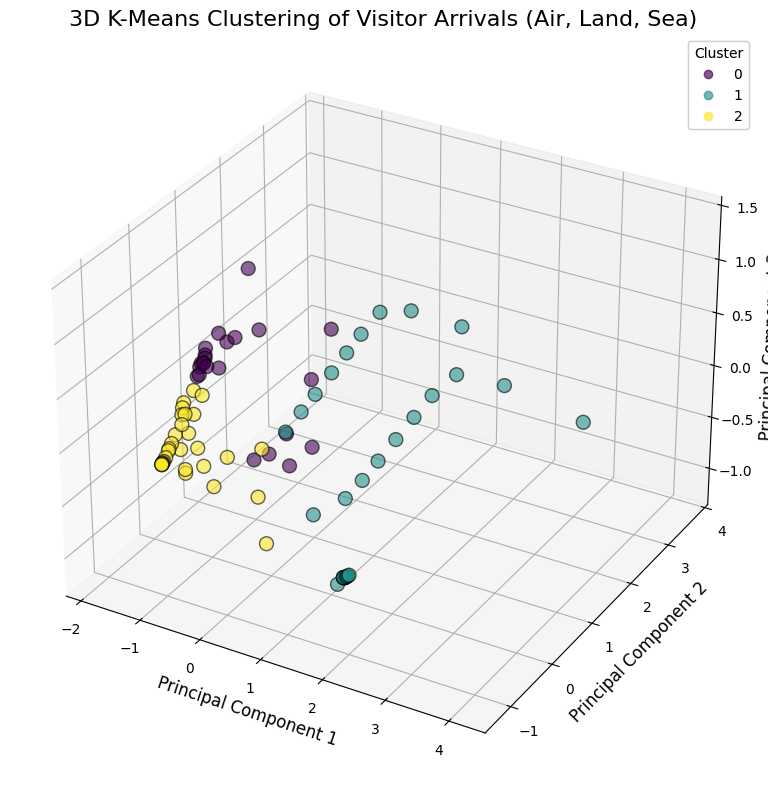

In [ ]:


# PCA for 3 components (3D)
pca = PCA(n_components=3)
A_pca = pca.fit_transform(A_scaled)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters as different colors
scatter = ax.scatter(A_pca[:, 0], A_pca[:, 1], A_pca[:, 2], c=df['Cluster'], cmap='viridis', s=100, alpha=0.6, edgecolor='k')

# Labels for the axes
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

# Title
ax.set_title('3D K-Means Clustering of Visitor Arrivals (Air, Land, Sea)', fontsize=16)

# Custom legend with cluster numbers (0, 1, 2)
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming you already have your data in the dataframe `df` and PCA result in `A_pca`
# Let's first run K-Means to assign cluster labels

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(A_scaled)

# Now, let's calculate the centroids of each cluster
centroids = kmeans.cluster_centers_

# Create a DataFrame for easier interpretation of centroids
centroids_df = pd.DataFrame(centroids, columns=['Air Arrivals', 'Land Arrivals', 'Sea Arrivals'])
centroids_df.index = [f'Cluster {i}' for i in range(3)]

# Show the centroids
print(centroids_df)

# Now let's examine the distribution of the clusters
cluster_summary = df.groupby('Cluster')[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals']].mean()
print("\nCluster Characteristics (Average Feature Values):")
print(cluster_summary)

# Create a label based on the highest feature value
cluster_labels = []
for i in range(3):
    cluster_data = cluster_summary.loc[i]
    if cluster_data['Air Arrivals'] > cluster_data['Land Arrivals'] and cluster_data['Air Arrivals'] > cluster_data['Sea Arrivals']:
        cluster_labels.append('High Air Arrivals')
    elif cluster_data['Land Arrivals'] > cluster_data['Air Arrivals'] and cluster_data['Land Arrivals'] > cluster_data['Sea Arrivals']:
        cluster_labels.append('High Land Arrivals')
    elif cluster_data['Sea Arrivals'] > cluster_data['Air Arrivals'] and cluster_data['Sea Arrivals'] > cluster_data['Land Arrivals']:
        cluster_labels.append('High Sea Arrivals')
    else:
        cluster_labels.append('Balanced Arrivals')

# Assign labels to each cluster
df['Cluster_Label'] = df['Cluster'].map({0: cluster_labels[0], 1: cluster_labels[1], 2: cluster_labels[2]})

# Display the final dataset with cluster labels
print("\nClustered Data with Labels:")
print(df[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Cluster', 'Cluster_Label']].head())


           Air Arrivals  Land Arrivals  Sea Arrivals
Cluster 0     -0.426385       1.373946     -0.443821
Cluster 1      1.009915      -0.717577      1.077101
Cluster 2     -0.683019      -0.335782     -0.736838

Cluster Characteristics (Average Feature Values):
          Air Arrivals  Land Arrivals   Sea Arrivals
Cluster                                             
0        228322.652174  144160.347826   27666.173913
1        897928.600000       0.000000  106610.033333
2        108679.533333   26315.600000   12457.033333

Clustered Data with Labels:
   Air Arrivals  Land Arrivals  Sea Arrivals  Cluster      Cluster_Label
0        280402         208687         31479        0  High Air Arrivals
1        196297          77090         55619        0  High Air Arrivals
2        289633         327509         85666        0  High Air Arrivals
3        270745         155378         92733        0  High Air Arrivals
4        169986          75631          1500        2  High Air Arrivals


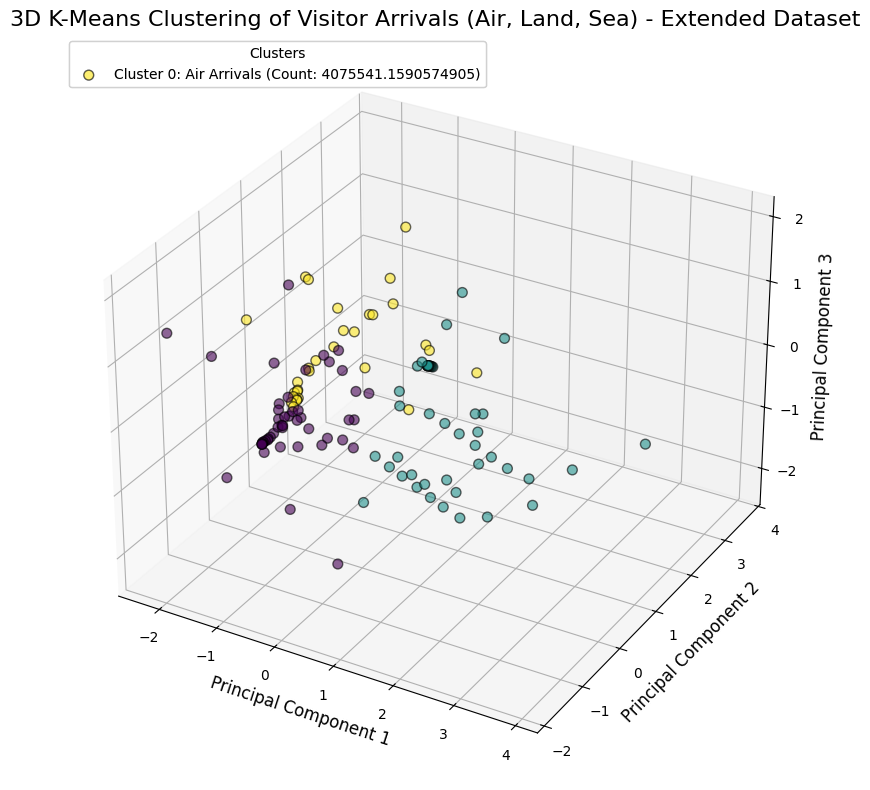

Cluster Counts and Dominant Modes (Extended Dataset):
         Air Arrivals  Land Arrivals  Sea Arrivals
Cluster                                           
0        4.075541e+06   1.191338e+06  1.023499e+06
1        3.881164e+07  -4.655984e+04  4.804178e+06
2        6.985877e+06   4.432842e+06  1.169935e+06

Dominant Mode per Cluster (Extended Dataset):
Cluster
0    Air Arrivals
1    Air Arrivals
2    Air Arrivals
dtype: object


In [ ]:

num_new_data_points = int(len(df) * 0.5)  # Increase by 50%

# Simulate new data based on the existing data
new_data_air = np.random.normal(loc=df['Air Arrivals'].mean(), scale=df['Air Arrivals'].std(), size=num_new_data_points)
new_data_land = np.random.normal(loc=df['Land Arrivals'].mean(), scale=df['Land Arrivals'].std(), size=num_new_data_points)
new_data_sea = np.random.normal(loc=df['Sea Arrivals'].mean(), scale=df['Sea Arrivals'].std(), size=num_new_data_points)

# Create a new DataFrame with the simulated data
new_data = pd.DataFrame({
    'Air Arrivals': new_data_air,
    'Land Arrivals': new_data_land,
    'Sea Arrivals': new_data_sea
})

# Add the new data to the original DataFrame
df_extended = pd.concat([df, new_data], ignore_index=True)

# Perform clustering on the extended dataset
X_extended = df_extended[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals']]
A_scaled_extended = scaler.fit_transform(X_extended)

# Apply K-Means clustering
kmeans_extended = KMeans(n_clusters=3, random_state=42)
df_extended['Cluster'] = kmeans_extended.fit_predict(A_scaled_extended)

# Apply PCA for visualization (2D and 3D)
pca_extended = PCA(n_components=3)
A_pca_extended = pca_extended.fit_transform(A_scaled_extended)

# Create a 3D scatter plot for the extended data
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters as different colors
scatter = ax.scatter(A_pca_extended[:, 0], A_pca_extended[:, 1], A_pca_extended[:, 2], c=df_extended['Cluster'], cmap='viridis', s=50, alpha=0.6, edgecolor='k')

# Set axis labels
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

# Title
ax.set_title('3D K-Means Clustering of Visitor Arrivals (Air, Land, Sea) - Extended Dataset', fontsize=16)

# Add legend with cluster number and dominant mode
cluster_counts_extended = df_extended.groupby('Cluster')[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals']].sum()
dominant_modes_extended = cluster_counts_extended.idxmax(axis=1)
dominant_counts_extended = cluster_counts_extended.max(axis=1)

legend_labels_extended = []
for i in range(3):
    label = f'Cluster {i}: {dominant_modes_extended[i]} (Count: {dominant_counts_extended[i]})'
    legend_labels_extended.append(label)

legend1 = ax.legend(legend_labels_extended, title="Clusters", loc='upper left', fontsize=10)
ax.add_artist(legend1)

# Show the plot
plt.tight_layout()
plt.show()

# Print out the counts and dominant modes for the extended dataset
print("Cluster Counts and Dominant Modes (Extended Dataset):")
print(cluster_counts_extended)
print("\nDominant Mode per Cluster (Extended Dataset):")
print(dominant_modes_extended)


In [ ]:
clustering_models = {
    'K-Means': KMeans(n_clusters=3, random_state=42),
    'Hierarchical': AgglomerativeClustering(n_clusters=3),
    'Affinity Propagation': AffinityPropagation(random_state=42),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

In [ ]:


# Apply clustering models and store the labels in the DataFrame
for name, model in clustering_models.items():
    # Fit the model
    model.fit(A_scaled)  # Use scaled data (A_scaled is assumed to be the scaled dataset)

    # Affinity Propagation might have less labels due to noise points (-1), handle it
    if name == 'Affinity Propagation':
        labels = model.labels_
        if len(labels) != len(df):  # Handle any discrepancy in label length
            labels = np.pad(labels, (0, len(df) - len(labels)), mode='constant', constant_values=-1)
        df[f'{name}_Cluster'] = labels
    else:
        df[f'{name}_Cluster'] = model.labels_

# Now we can evaluate the models using the clustering results
evaluation_results = {}

for name, model in clustering_models.items():
    # Retrieve the cluster labels from the DataFrame
    cluster_column = f'{name}_Cluster'

    # Ensure we have the correct column
    if cluster_column not in df.columns:
        print(f"Cluster column '{cluster_column}' not found for {name}")
        continue

    # Calculate evaluation metrics
    silhouette = silhouette_score(A_scaled, df[cluster_column])
    db_index = davies_bouldin_score(A_scaled, df[cluster_column])
    ari = adjusted_rand_score(df[cluster_column], df[cluster_column])  # Self-comparison for ARI

    # Calinski-Harabasz Index
    calinski_harabasz = calinski_harabasz_score(A_scaled, df[cluster_column])

    # Store the results
    evaluation_results[name] = {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': db_index,

        'Calinski-Harabasz Index': calinski_harabasz
    }

# Print out the evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"Evaluation Metrics for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")


Evaluation Metrics for K-Means:
  Silhouette Score: 0.4438
  Davies-Bouldin Index: 0.7858
  Calinski-Harabasz Index: 80.9402
Evaluation Metrics for Hierarchical:
  Silhouette Score: 0.4249
  Davies-Bouldin Index: 0.8413
  Calinski-Harabasz Index: 75.9946
Evaluation Metrics for Affinity Propagation:
  Silhouette Score: 0.4769
  Davies-Bouldin Index: 0.6564
  Calinski-Harabasz Index: 103.4353
Evaluation Metrics for Agglomerative Clustering:
  Silhouette Score: 0.4249
  Davies-Bouldin Index: 0.8413
  Calinski-Harabasz Index: 75.9946
Evaluation Metrics for DBSCAN:
  Silhouette Score: 0.3603
  Davies-Bouldin Index: 1.1727
  Calinski-Harabasz Index: 31.6255


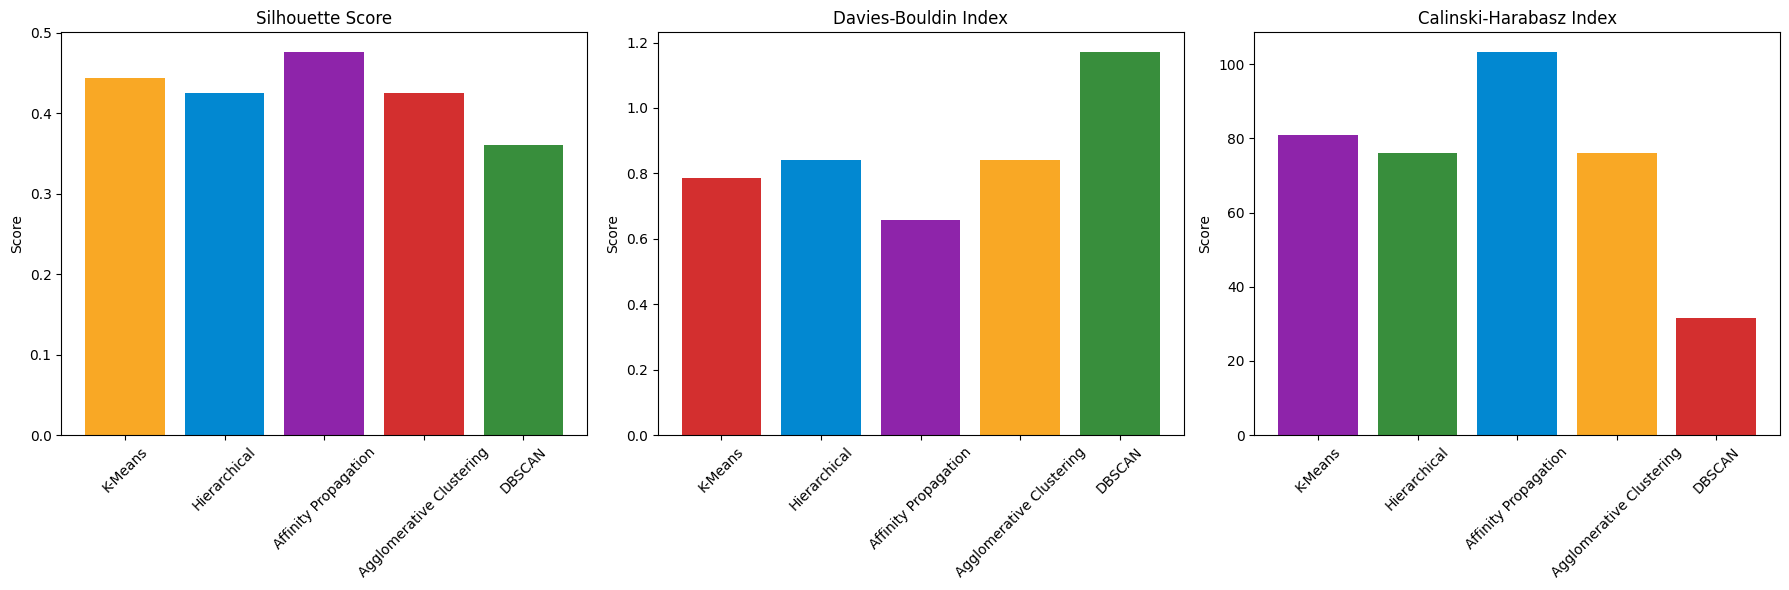

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Evaluation metrics for the clustering models
evaluation_metrics = {
    'K-Means': {
        'Silhouette Score': 0.4438,
        'Davies-Bouldin Index': 0.7858,
        'Calinski-Harabasz Index': 80.9402
    },
    'Hierarchical': {
        'Silhouette Score': 0.4249,
        'Davies-Bouldin Index': 0.8413,
        'Calinski-Harabasz Index': 75.9946
    },
    'Affinity Propagation': {
        'Silhouette Score': 0.4769,
        'Davies-Bouldin Index': 0.6564,
        'Calinski-Harabasz Index': 103.4353
    },
    'Agglomerative Clustering': {
        'Silhouette Score': 0.4249,
        'Davies-Bouldin Index': 0.8413,
        'Calinski-Harabasz Index': 75.9946
    },
    'DBSCAN': {
        'Silhouette Score': 0.3603,
        'Davies-Bouldin Index': 1.1727,
        'Calinski-Harabasz Index': 31.6255
    }
}

# Convert the evaluation metrics into a DataFrame for easier plotting
metrics_df = pd.DataFrame(evaluation_metrics).T

# Plotting the evaluation metrics
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Custom color palette
silhouette_colors = ['#F9A825', '#0288D1', '#8E24AA', '#D32F2F', '#388E3C']
davies_bouldin_colors = ['#D32F2F', '#0288D1', '#8E24AA', '#F9A825', '#388E3C']
calinski_harabasz_colors = ['#8E24AA', '#388E3C', '#0288D1', '#F9A825', '#D32F2F']

# Plot Silhouette Scores with colorful bars
axs[0].bar(metrics_df.index, metrics_df['Silhouette Score'], color=silhouette_colors)
axs[0].set_title('Silhouette Score')
axs[0].set_ylabel('Score')
axs[0].tick_params(axis='x', rotation=45)

# Plot Davies-Bouldin Index with colorful bars
axs[1].bar(metrics_df.index, metrics_df['Davies-Bouldin Index'], color=davies_bouldin_colors)
axs[1].set_title('Davies-Bouldin Index')
axs[1].set_ylabel('Score')
axs[1].tick_params(axis='x', rotation=45)

# Plot Calinski-Harabasz Index with colorful bars
axs[2].bar(metrics_df.index, metrics_df['Calinski-Harabasz Index'], color=calinski_harabasz_colors)
axs[2].set_title('Calinski-Harabasz Index')
axs[2].set_ylabel('Score')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
